#  Oxford: smooth fit to log-odds ratios


## Importation des librariries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy.special import expit 
from math import sqrt
import seaborn as sea

## Data 

In [2]:
K = 120
r1 = [3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6, 
5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 
8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 
4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 
9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 
9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 
7, 5, 7, 6, 3, 7]
n1 = [28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
51, 55, 41, 53, 51, 42, 46, 54, 32]
r0 = [0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 
4, 1, 4, 5, 2, 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 
5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 
8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 
9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 
3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1]
n0 = [28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
51, 55, 41, 53, 51, 42, 46, 54, 32]
year = [-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, 
-5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, 
-3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, 
-1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 
6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10]
data=np.concatenate((np.array([K]),np.array(r1),np.array(n1),np.array(r0),np.array(n0),np.array(year)))

## Initialisattion

In [3]:
alpha_init = 0
beta1_init = 0
beta2_init = 0
sigma_sq_init = 1
mu_init = [0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0]
b_init= [0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0, 
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,0,0,0,0,0,0]
init=np.concatenate((np.array([alpha_init]),np.array([beta1_init]),np.array([beta2_init]),np.array([sigma_sq_init]),np.array(mu_init),np.array(b_init)))
init=init.reshape(1,init.shape[0])

## Implémentation: Gibbs sampler

In [4]:
def log_psi(alpha,beta1,beta2,b,year):
    return(alpha+beta1*year+beta2*(year**2-22)+b)

In [5]:
def p1(mu,alpha,beta1,beta2,b,year):
    return(expit(mu+log_psi(alpha,beta1,beta2,b,year)))

In [6]:
def sampler(nchain,data,init,prop_sd):
    chain=np.zeros((nchain,4+2*K))
    acc_rates=np.zeros((4+2*K))
    chain[0,:]=init
    k=data[0]
    r1,n1,r0,n0,year=data[1:K+1],data[K+1:2*K+1],data[2*K+1:3*K+1],data[3*K+1:4*K+1],data[4*K+1:5*K+1]
    c=1e-3
    d=1e-3
    for i in range(nchain-1):
        alpha,beta1,beta2,sigma_sq,mu,b= chain[i,0],chain[i,1],chain[i,2],chain[i,3],chain[i,4:4+K],chain[i,4+K:4+2*K]
        tau=1/sigma_sq
        
        #updating alpha
        prop = np.random.normal(alpha,prop_sd[0],size=1)[0]
        
        top_alpha=(-prop**2/(2*10**(6)))+np.sum(r1*np.log(p1(mu,prop,beta1,beta2,b,year))+(n1-r1)*np.log(1-p1(mu,prop,beta1,beta2,b,year)))

        bottom=(-alpha**2/(2*10**(6)))+np.sum(r1*np.log(p1(mu,alpha,beta1,beta2,b,year))+(n1-r1)*np.log(1-p1(mu,alpha,beta1,beta2,b,year)))
        
        acc_prob = np.exp(top_alpha-bottom)
        
        if np.random.uniform() < acc_prob:
            chain[i+1,0] = prop
            acc_rates[0] += 1
        else:
            chain[i+1,0]=alpha
            
        #updating beta1
        prop = np.random.normal(beta1,prop_sd[1],size=1)[0]
        
        top_beta1=(-prop**2/(2*10**(6)))+np.sum(r1*np.log(p1(mu,alpha,prop,beta2,b,year))+(n1-r1)*np.log(1-p1(mu,alpha,prop,beta2,b,year)))
        bottom=(-beta1**2/(2*10**(6)))+np.sum(r1*np.log(p1(mu,alpha,beta1,beta2,b,year))+(n1-r1)*np.log(1-p1(mu,alpha,beta1,beta2,b,year)))
        
        acc_prob = np.exp(top_beta1 - bottom)
        
        if np.random.uniform() < acc_prob:
            chain[i+1,1] = prop
            acc_rates[1] += 1
        else:
            chain[i+1,1]=beta1
        
        
        #updating beta2
        prop = np.random.normal(beta2,prop_sd[2],size=1)[0]
        
        top_beta2=(-prop**2/(2*10**(6)))+np.sum(r1*np.log(p1(mu,alpha,beta1,prop,b,year))+(n1-r1)*np.log(1-p1(mu,alpha,beta1,prop,b,year)))
        bottom=(-beta2**2/(2*10**(6)))+np.sum(r1*np.log(p1(mu,alpha,beta1,beta2,b,year))+(n1-r1)*np.log(1-p1(mu,alpha,beta1,beta2,b,year)))
        
        acc_prob = np.exp(top_beta2 - bottom)
        
        if np.random.uniform() < acc_prob:
            chain[i+1,2] = prop
            acc_rates[2] += 1
        else:
            chain[i+1,2]=beta2
        
        #updating sigma_sq (through tau)
        
        c_star = K/2+c
        d_star = d+ 0.5 * sum(b**2)
        chain[i+1,3] = 1/np.random.gamma(shape=c_star,scale=d_star,size=1)[0]
        
        
        #updating mu
        
        for j in range(K):
            prop= np.random.normal(mu[j],prop_sd[3],size=1)[0]
            
            top_mu=(-prop**2/(2*10**(6)))+(r1[j]*np.log(p1(prop,alpha,beta1,beta2,b[j],year[j]))+(n1[j]-r1[j])*np.log(1-p1(prop,alpha,beta1,beta2,b[j],year[j])))+(r0[j]*np.log(expit(prop))+(n0[j]-r0[j])*np.log(1-expit(prop)))
            bottom=(-mu[j]**2/(2*10**(6)))+(r1[j]*np.log(p1(mu[j],alpha,beta1,beta2,b[j],year[j]))+(n1[j]-r1[j])*np.log(1-p1(mu[j],alpha,beta1,beta2,b[j],year[j])))+(r0[j]*np.log(expit(mu[j]))+(n0[j]-r0[j])*np.log(1-expit(mu[j])))
                    
            acc_prob = np.exp(top_mu - bottom)
            if np.random.uniform() < acc_prob:
                chain[i+1,4+j]=prop
                acc_rates[4+j] += 1
            else:
                chain[i+1,4+j]=mu[j]
        
        #updating b
        
        for j in range(K):
            prop= np.random.normal(b[j],prop_sd[4],size=1)[0]

            top_b=(-prop**2*tau/2)+(r1[j]*np.log(p1(mu[j],alpha,beta1,beta2,prop,year[j]))+(n1[j]-r1[j])*np.log(1-p1(mu[j],alpha,beta1,beta2,prop,year[j])))
            bottom=(-b[j]**2*tau/2)+(r1[j]*np.log(p1(mu[j],alpha,beta1,beta2,b[j],year[j]))+(n1[j]-r1[j])*np.log(1-p1(mu[j],alpha,beta1,beta2,b[j],year[j])))
            
            acc_prob = np.exp(top_b - bottom)
            if np.random.uniform() < acc_prob:
                chain[i+1,4+K+j]=prop
                acc_rates[4+K+j] += 1
            else:
                chain[i+1,4+K+j]=b[j]
    
    return(chain,acc_rates/nchain)

In [20]:
prop_sd=[0.05,0.01,0.001,0.5,0.01]
nchain=10000
chain,accuracy= sampler(nchain,data,init,prop_sd)

## Résultats et visualisation

In [21]:
alpha=chain[1001:10000,0]
beta1=chain[1001:10000,1]
beta2=chain[1001:10000,2]
sigma=np.sqrt(chain[1001:10000,3])

## $ \alpha $

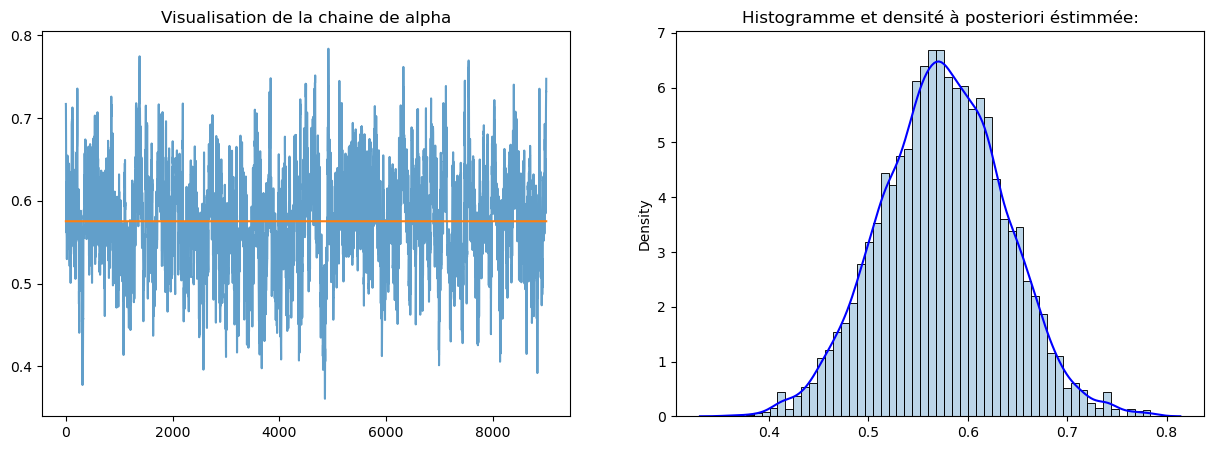

La moyenne de la chaine vaut:  0.5753155002717629
L'écart type de alpha vaut:  0.061900577653678505
Le taux d'accéptation pour alpha vaut:  61.260000000000005 %


In [22]:
m_alpha=np.mean(alpha)
sd_alpha=np.std(alpha)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.plot(np.linspace(1,9000,8999),alpha,alpha=0.7)
ax1.plot(np.linspace(1,9000,8999),m_alpha*np.ones(8999))
ax1.set_title("Visualisation de la chaine de alpha")

ax=sea.histplot(alpha,stat='density',alpha=0.3)
sea.kdeplot(alpha,color='b', ax=ax)
ax2.set_title("Histogramme et densité à posteriori éstimmée:")

plt.show()


print('La moyenne de la chaine vaut: ',m_alpha)
print("L'écart type de alpha vaut: ",sd_alpha)
print("Le taux d'accéptation pour alpha vaut: ",accuracy[0]*100,'%')

## $ \beta1$

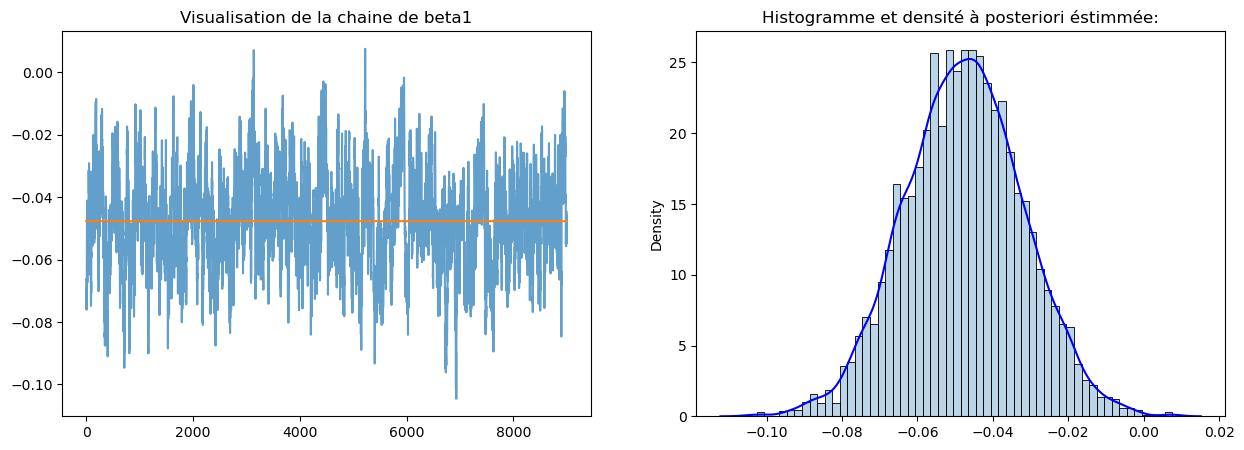

La moyenne de la chaine vaut:  -0.047696451916144654
L'écart type de beta1 vaut:  0.01563588767292894
Le taux d'accéptation pour beta1 vaut:  67.80000000000001 %


In [23]:
m_beta1=np.mean(beta1)
sd_beta1=np.std(beta1)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.plot(np.linspace(1,9000,8999),beta1,alpha=0.7)
ax1.plot(np.linspace(1,9000,8999),m_beta1*np.ones(8999))
ax1.set_title("Visualisation de la chaine de beta1")

ax=sea.histplot(beta1,stat='density',alpha=0.3)
sea.kdeplot(beta1,color='b', ax=ax)
ax2.set_title("Histogramme et densité à posteriori éstimmée:")

plt.show()


print('La moyenne de la chaine vaut: ',m_beta1)
print("L'écart type de beta1 vaut: ",sd_beta1)
print("Le taux d'accéptation pour beta1 vaut: ",accuracy[1]*100,'%')

## $ \beta2$

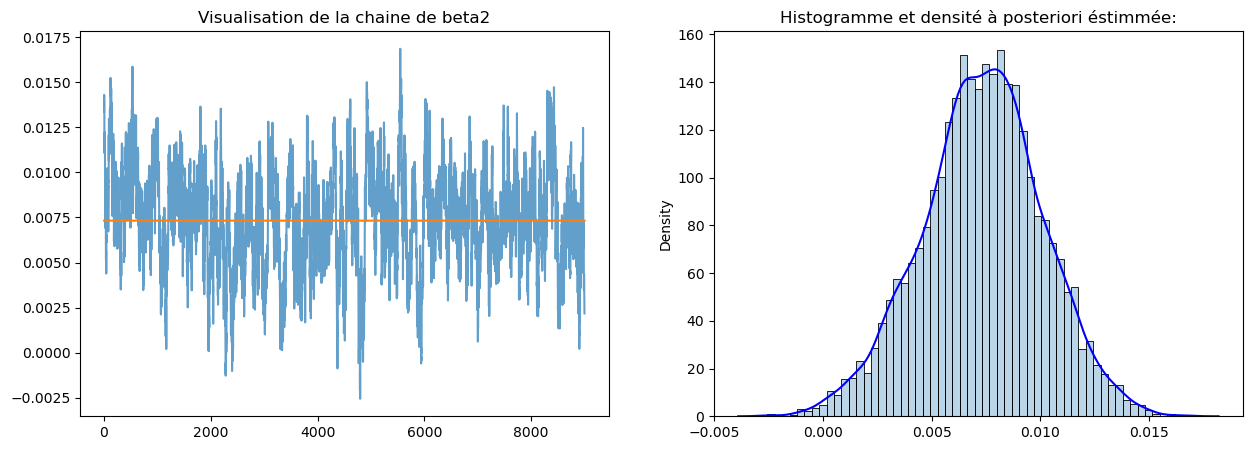

La moyenne de la chaine vaut:  0.007324511843881293
L'écart type de beta2 vaut:  0.0027670322480169685
Le taux d'accéptation pour beta2 vaut:  81.37 %


In [24]:
m_beta2=np.mean(beta2)
sd_beta2=np.std(beta2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.plot(np.linspace(1,9000,8999),beta2,alpha=0.7)
ax1.plot(np.linspace(1,9000,8999),m_beta2*np.ones(8999))
ax1.set_title("Visualisation de la chaine de beta2")

ax=sea.histplot(beta2,stat='density',alpha=0.3)
sea.kdeplot(beta2,color='b', ax=ax)
ax2.set_title("Histogramme et densité à posteriori éstimmée:")

plt.show()


print('La moyenne de la chaine vaut: ',m_beta2)
print("L'écart type de beta2 vaut: ",sd_beta2)
print("Le taux d'accéptation pour beta2 vaut: ",accuracy[2]*100,'%')


## $ \sigma$

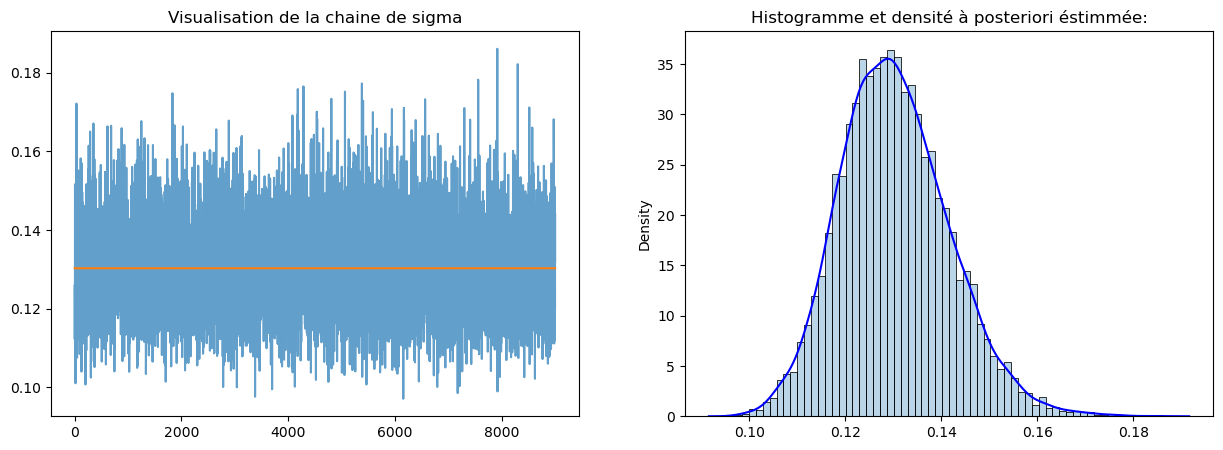

La moyenne de la chaine vaut:  0.13028502821265367
L'écart type de sigma vaut:  0.011313667660521222


In [25]:
m_sigma=np.mean(sigma)
sd_sigma=np.std(sigma)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.plot(np.linspace(1,9000,8999),sigma,alpha=0.7)
ax1.plot(np.linspace(1,9000,8999),m_sigma*np.ones(8999))
ax1.set_title("Visualisation de la chaine de sigma")

ax=sea.histplot(sigma,stat='density',alpha=0.3)
sea.kdeplot(sigma,color='b', ax=ax)
ax2.set_title("Histogramme et densité à posteriori éstimmée:")

plt.show()

print('La moyenne de la chaine vaut: ',m_sigma)
print("L'écart type de sigma vaut: ",sd_sigma)


### $\log\left(\psi\right)$

Text(0.5, 0, 'Year')

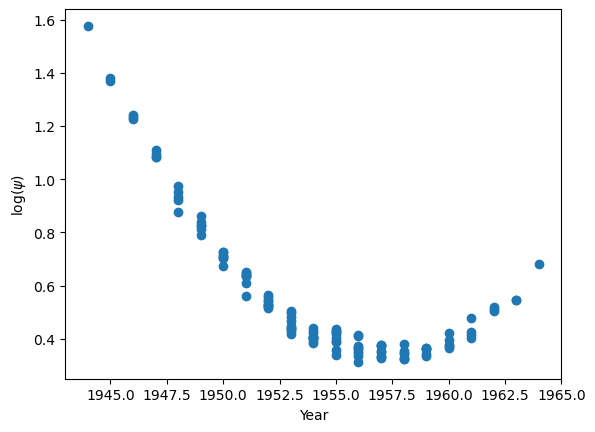

In [13]:
b=np.mean(chain[:,4+K:4+2*K],axis=0)
logpsi=log_psi(m_alpha,m_beta1,m_beta2,b,np.array(year))
plt.scatter(1954 + np.array(year),logpsi)
plt.ylabel('log($\psi$)')
plt.xlabel('Year')